<a href="https://colab.research.google.com/github/Y07-assine/Sales-analysis/blob/main/Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import the needed packages

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import os

##Concat the 12 months of sales data into a single CSV file

In [14]:
folder = '/content/drive/MyDrive/sales_data'

files = [file for file in os.listdir(folder)]

all_data = pd.DataFrame()

for file in files:
  df = pd.read_csv(folder+"/"+file)
  all_data = pd.concat([all_data,df])

all_data.to_csv("all_data.csv",index=False)

##Read the data

In [53]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [22]:
df.shape

(186850, 6)

In [23]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


##Clean up the data

Drop rows of NAN

In [34]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [54]:
df = df.dropna(how='all')

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


Trying to create a month column, we find out that same date have a string value 'oder date'

Find 'Order Date' and delete it

In [55]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


Convert columns to the correct type

In [57]:
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

##Add Month column

In [56]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


## The best month for sales

**Add sales columns** 

In [58]:
df['Sales'] = df['Price Each']*df['Quantity Ordered']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [62]:
sales_per_months = df.groupby('Month').sum()
sales_per_months

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Let's plot the result

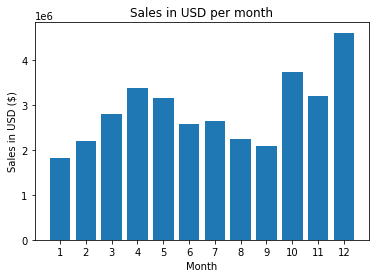

In [65]:
months = range(1,13)

plt.bar(months,sales_per_months['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.title('Sales in USD per month')
plt.show()

##City with the highest number of sales

Let's first add city column

In [84]:
df['City'] = df['Purchase Address'].str.split(',', n=1, expand=True)[1]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,"Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,"Dallas, TX 75001"
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,"Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,"Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,"New York City, NY 10001"


In [85]:
city_sales = df.groupby('City').sum()
city_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA 30301",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX 73301",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA 02215",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX 75001",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA 90001",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY 10001",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME 04101",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR 97035",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA 94016",50239,8.211462e+06,315520,8.262204e+06


Let's plot the result

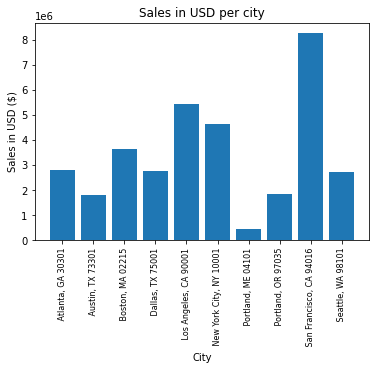

In [88]:
cities = [city for city,df in df.groupby('City')]
plt.bar(cities,city_sales['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.title('Sales in USD per city')
plt.show()

##Best time to display advertisements to maximise likelihood of customer's buying product

In [89]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [94]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Count'] = 1

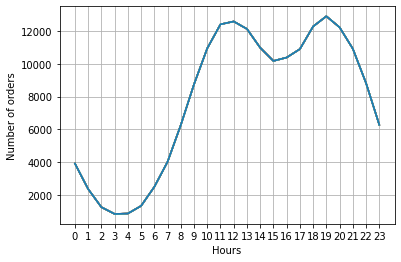

In [100]:
hours = [h for h,df in df.groupby('Hour')]

plt.plot(hours,df.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.grid()
plt.show()


##Product most often sold together

In [101]:
dup = df[df['Order ID'].duplicated(keep=False)]
dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,"San Francisco, CA 94016",20,12,1
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,"San Francisco, CA 94016",20,12,1
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,"San Francisco, CA 94016",9,28,1
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,"San Francisco, CA 94016",9,28,1
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,"New York City, NY 10001",10,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186799,161960,USB-C Charging Cable,2,11.95,2019-02-01 11:32:00,"867 Cherry St, Boston, MA 02215",2,23.90,"Boston, MA 02215",11,32,1
186811,161972,Google Phone,1,600.00,2019-02-02 21:01:00,"59 Lincoln St, Austin, TX 73301",2,600.00,"Austin, TX 73301",21,1,1
186812,161972,USB-C Charging Cable,1,11.95,2019-02-02 21:01:00,"59 Lincoln St, Austin, TX 73301",2,11.95,"Austin, TX 73301",21,1,1
186837,161997,Google Phone,1,600.00,2019-02-28 22:15:00,"845 8th St, San Francisco, CA 94016",2,600.00,"San Francisco, CA 94016",22,15,1


In [104]:
dup['Grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
dup = dup[['Order ID','Grouped']].drop_duplicates()
dup.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [107]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

##Product sold the most

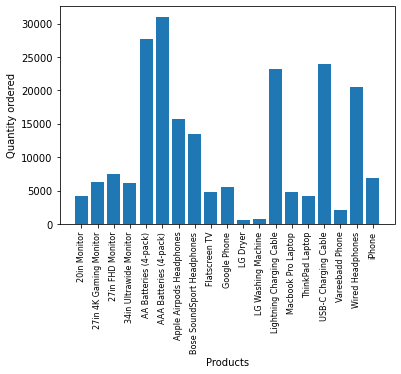

In [110]:
products_group = df.groupby('Product')
quantity_ordered = products_group.sum()['Quantity Ordered']

products = [prod for prod,df in products_group]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Quantity ordered')
plt.show()

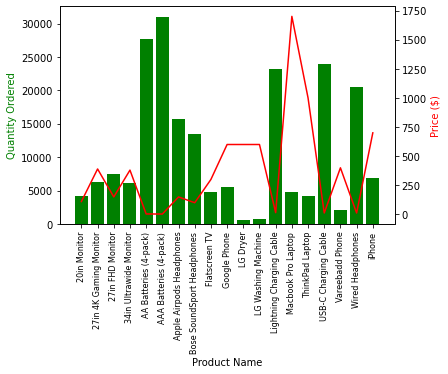

In [114]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()